In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('abalone.data',header=None, nrows = 1000)
data.columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']


In [3]:
data = data.sort_values(by='length')
data

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
236,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
238,I,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
237,I,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
719,I,0.150,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2
696,I,0.155,0.105,0.050,0.0175,0.0050,0.0035,0.0050,4
...,...,...,...,...,...,...,...,...,...
165,M,0.725,0.570,0.190,2.5500,1.0705,0.4830,0.7250,14
891,M,0.730,0.595,0.230,2.8255,1.1465,0.4190,0.8970,17
478,M,0.735,0.590,0.225,1.7560,0.6370,0.3405,0.5800,21
334,F,0.740,0.600,0.195,1.9740,0.5980,0.4085,0.7100,16


In [163]:
colA = np.array(data['length'])
colB = np.array(data['whole_weight'])

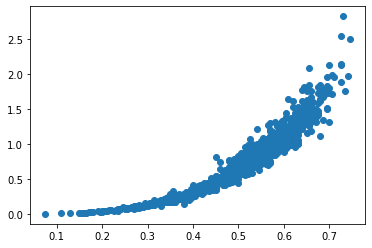

In [164]:
plt.scatter(colA, colB)

In [165]:
mcolA = np.mat(colA)
mcolB = np.mat(colB)


one = np.ones((1, len(colA)))
X = np.hstack((one.T, mcolA.T))

In [166]:
from tqdm import tqdm

In [167]:
def kernel(point, xmat, k):
    m, n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    
    for j in range(m):
        diff = point - X[j]
        weights[j, j] = np.exp(diff * diff.T / (-2.0 * k**2))
        
    return weights


def localWeight(point, xmat, ymat, k):
    weight = kernel(point, xmat, k)
    
    W = (X.T * (weight*X)).I * (X.T * weight * ymat.T)
    return W


def localWeightRegression(xmat, ymat, k):
    m,n = np.shape(xmat)
    y_hat = np.zeros(m)
    
    for i in tqdm(range(m)):
        y_hat[i] = xmat[i] * localWeight(xmat[i], xmat, ymat, k)
        
    return y_hat
    
    
    

y_hat = localWeightRegression(X, mcolB, 0.02)

100%|██████████| 1000/1000 [00:43<00:00, 23.08it/s]


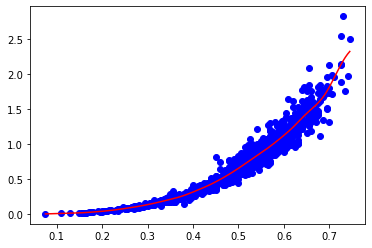

In [168]:
Xsort = X.copy()
Xsort.sort(axis=0)
plt.scatter(colA, colB, color = 'blue')
plt.plot(Xsort[:, 1], y_hat[X[:, 1].argsort(0)], color = 'red')